### Import Training and Testing dataset into notebook

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

#Import RawData.drop(RawData.columns[0], axis=1, inplace=True)the group 1 data
TrainData = pd.read_csv('train.csv', index_col=0)
TrainData



,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0


### Define the variables and features in the data                                                                                                                                                                                                                                             
**Gender:** Gender of the customer (binary feature);

**Age:** Age of the customer in years (numeric continuous);

**Driving_License** (binary (qualitative) feature):
- 0 : Customer doesn't have DL;
- 1 : Customer already has DL.

**Region_Code:** Unique code for the region of the customer (qualitative categorical feature);

**Previously_Insured** (binary (qualitative) feature):
- 0 : Customer doesn't have Vehicle Insurance;
- 1 : Customer already has Vehicle Insurance.

**Vehicle_Age:** Age of the Vehicle (ordinal categorical feature);

**Vehicle_Damage** (binary (qualitative) feature):
- 0 (no) : Customer didn't get his/her vehicle damaged in the past;
- 1 (yes): Customer got his/her vehicle damaged in the past.

**Annual_Premium:** The amount customer needs to pay as premium in the year (numeric continuous);

**Policy_Sales_Channel:** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. (qualitative categorical feature);

**Vintage:** Number of Days, Customer has been associated with the company (numeric continuous);

**Response** (binary target variable):
- 0 : Customer isn't interested in Vehicle Insurance provided by the company;
- 1 : Customer is interested in Vehicle Insurance provided by the company.


## Data Exploration

In [6]:
# Checking the summarized information about the data                                                                                                                                                     and missing values
print("Shape of the Train data: {} \n".format(TrainData.shape)) #check the number of rows and columns
TrainData.info()

Shape of the Train data: (381109, 11) 

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


From the above information, there is no feature with a missing or null value.

In [7]:
# Checking the statistical distribution of each numerical feature in the data 
TrainData.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
# Checking the statistical distribution of other categorical feature with datatype "Object" 
TrainData.describe(include = 'O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [9]:
# Replace the categorical features Gender and Vehicle_Damage with binary numerical values 1 $ 0.
# Replace the categorical variable Vehicle_age with ordinal numerical values 1, 2 $ 3.
TrainData['Gender'] = TrainData['Gender'].replace({'Male': 0, 'Female': 1})
TrainData['Vehicle_Age'] = TrainData['Vehicle_Age'].replace({'< 1 Year': 1, '1-2 Year': 2,'> 2 Years': 3 })
TrainData['Vehicle_Damage'] = TrainData['Vehicle_Damage'].replace({'No': 0, 'Yes': 1})
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 34.9 MB


## Exploratory Data Analysis (EDA)

#### 1) Check the distribution of the target (response) in the training data

Not interested (0) = 334399 (87.74%)
Interested (1) = 46710 (12.26%)


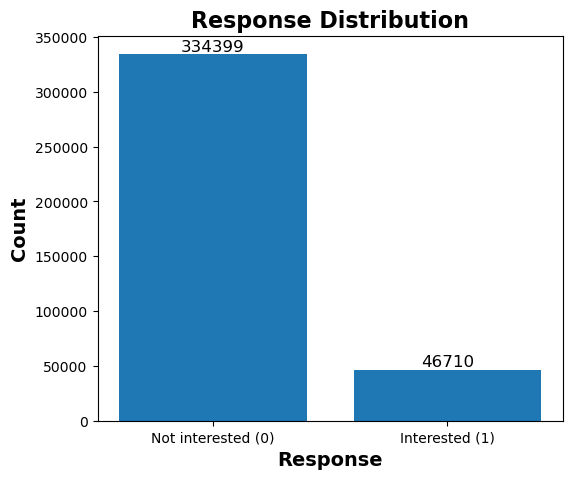

In [10]:
counts = TrainData["Response"].value_counts()
print(f"Not interested (0) = {counts[0]} ({counts[0]/counts.sum()*100:.2f}%)")
print(f"Interested (1) = {counts[1]} ({counts[1]/counts.sum()*100:.2f}%)")


plt.figure(figsize=(6, 5))
plt.bar(counts.index, counts.values)
plt.xlabel("Response", weight='bold', fontsize=14)
plt.ylabel("Count", weight='bold', fontsize=14)
plt.title("Response Distribution", weight='bold', fontsize=16)
plt.xticks(counts.index, ["Not interested (0)", "Interested (1)"])

# Iterate over the bar chart and add the count to each bar
for i, v in enumerate(counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)
plt.show()

This dataset is imbalanced with approximatly 88% of the reponses given as "not interested" and only 12% of the response were interested in buying the vehicle insurance. This imnbalance will be addressed before the model training.

2) **Understand the relationship between each pair of features in the training data**

In [11]:
Numeric_columns = ['Gender', 'Age', 'Driving_License', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response']

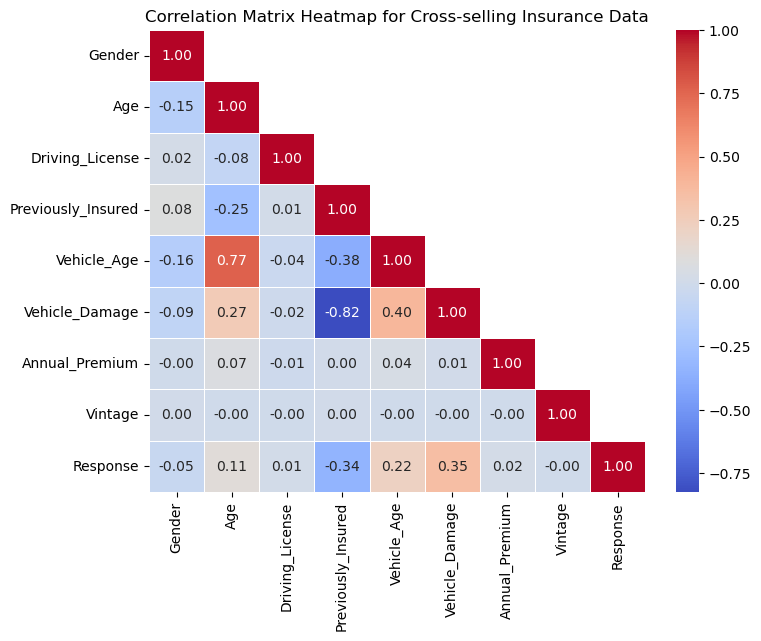

In [12]:
# CREATE A CORRELATION MATRIX WITH ALL THE NUMERIC FEATURES AND SHOW IT ON A TRIANGULAR HEATMAP
import seaborn as sns
correlation_matrix = TrainData[Numeric_columns].corr()

mask = np.triu(np.ones_like(correlation_matrix), k=1)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix Heatmap for Cross-selling Insurance Data')
plt.show()

3) **Visualise the frequency distribution of customers by gender, driving_license, Previously_Insured and Vechicle damaged**

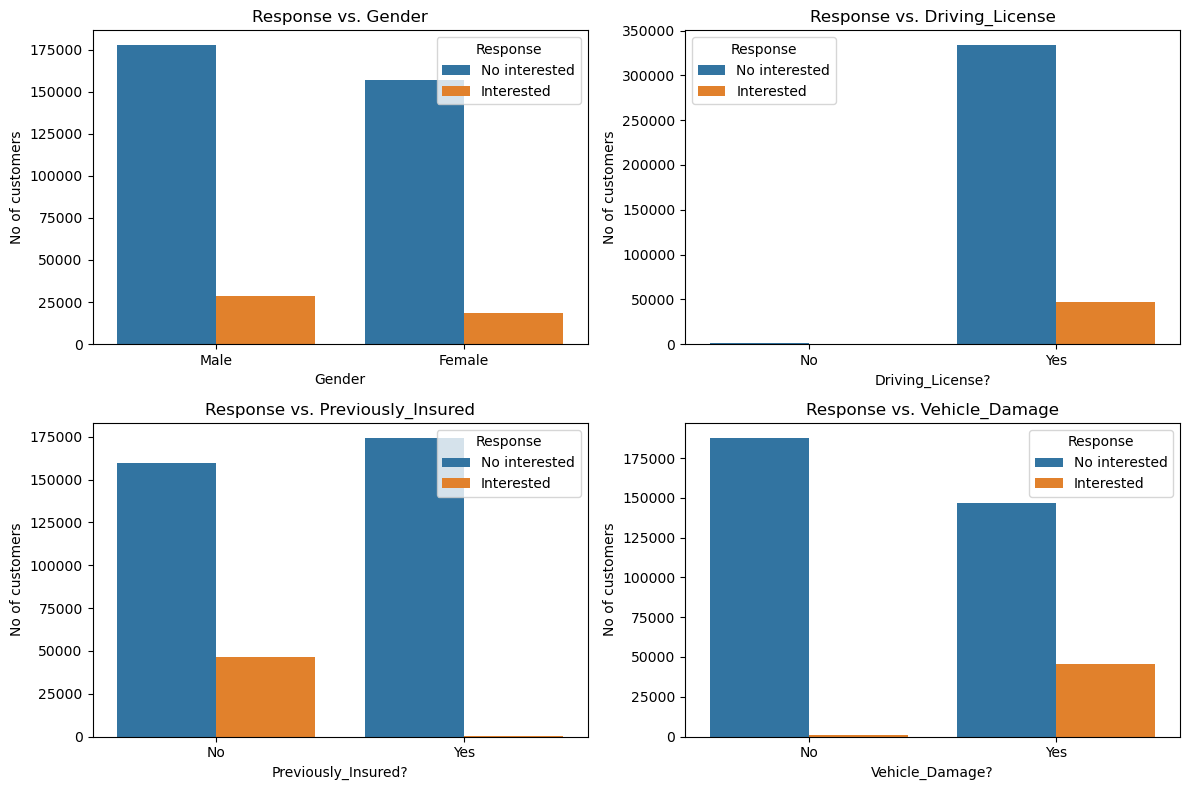

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Set up the plot
# Count plot for 'gender'
sns.countplot(x='Gender', hue='Response', data=TrainData, ax=axes[0, 0])
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('No of customers')
axes[0, 0].set_title('Response vs. Gender')
axes[0, 0].set_xticklabels(['Male', 'Female']) 
axes[0, 0].legend(title='Response', labels=['No interested', 'Interested'])
# Count plot for 'Driving_License'
sns.countplot(x='Driving_License', hue='Response', data=TrainData, ax=axes[0, 1])
axes[0, 1].set_xlabel('Driving_License?')
axes[0, 1].set_ylabel('No of customers')
axes[0, 1].set_title('Response vs. Driving_License')
axes[0, 1].set_xticklabels(['No', 'Yes']) 
axes[0, 1].legend(title='Response', labels=['No interested', 'Interested'])
# Count plot for 'Previously_Insured'
sns.countplot(x='Previously_Insured', hue='Response', data=TrainData, ax=axes[1, 0])
axes[1, 0].set_xlabel('Previously_Insured?')
axes[1, 0].set_ylabel('No of customers')
axes[1, 0].set_title('Response vs. Previously_Insured')
axes[1, 0].set_xticklabels(['No', 'Yes']) 
axes[1, 0].legend(title='Response', labels=['No interested', 'Interested'])
# Count plot for 'Vehicle_Damage'
sns.countplot(x='Vehicle_Damage', hue='Response', data=TrainData, ax=axes[1, 1])
axes[1, 1].set_xlabel('Vehicle_Damage?')
axes[1, 1].set_ylabel('No of customers')
axes[1, 1].set_title('Response vs. Vehicle_Damage')
axes[1, 1].set_xticklabels(['No', 'Yes']) 
axes[1, 1].legend(title='Response', labels=['No interested', 'Interested'])
plt.tight_layout()
plt.show()

4) **Use Kernerl Density estimation plot to view the distribution of the continous numerical  varaiables for each class of response**

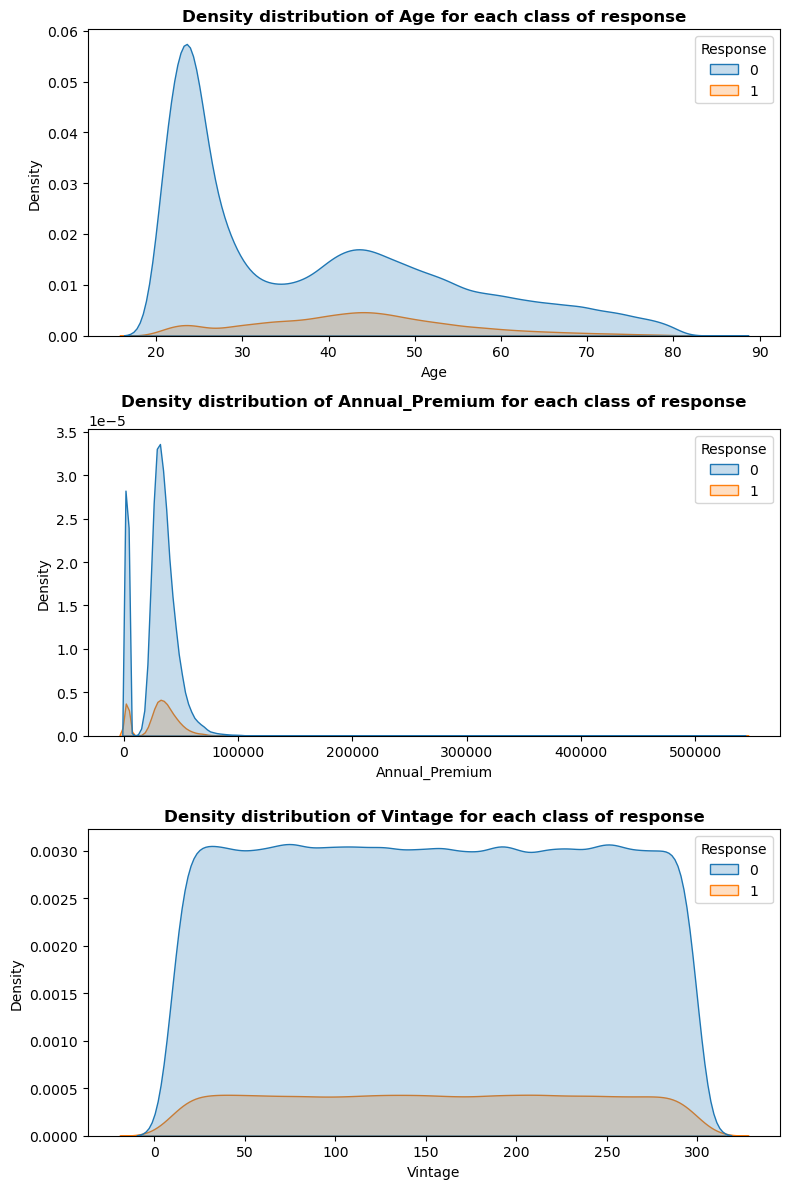

In [14]:
Num_Cont = ['Age', 'Annual_Premium', 'Vintage']

# Create subplots
num_rows = len(Num_Cont)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, num_rows * 4))

# Loop through each continuous variable and create a KDE plot
for i, column in enumerate(Num_Cont):
    sns.kdeplot(data=TrainData, x=column, hue ='Response', ax=axes[i], fill=True)
    axes[i].set_title(f"Density distribution of {column} for each class of response", weight='bold')
    axes[i].set_xlabel(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()


5) **Visualise the distribution of customers based on the age of their vehicles and the relationship between the vehicle age and Coustomer's interest in Vechile insurance**

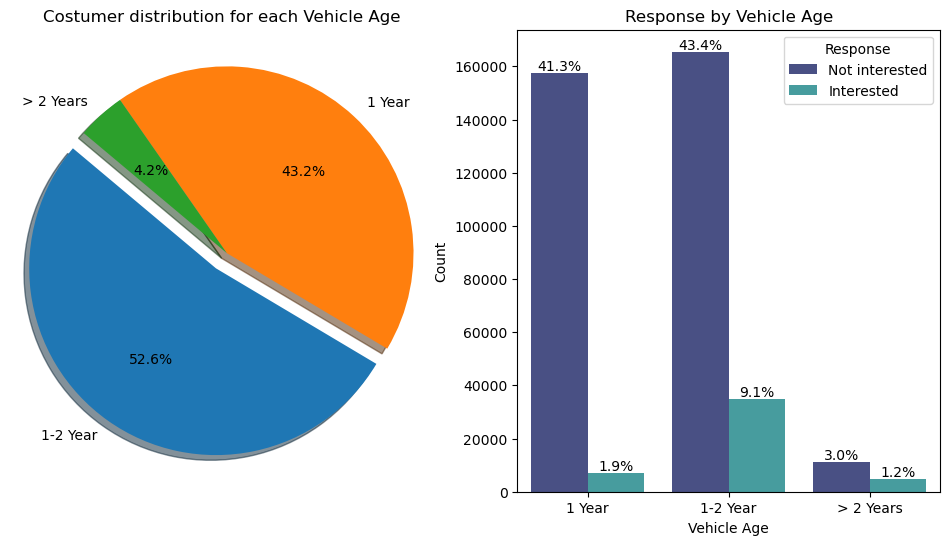

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pie chart subplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Count the occurrences of each Vehicle_Age category
vehicle_age_counts = TrainData["Vehicle_Age"].value_counts()

# Create labels and explode values for the pie chart
labels =  ['1-2 Year','1 Year', '> 2 Years']
sizes = vehicle_age_counts.values
explode = (0.1, 0, 0)  # Explode the first slice (1 Year)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title("Costumer distribution for each Vehicle Age")

# Create the countplot with percentage labels
plt.subplot(1, 2, 2)
countplot = sns.countplot(data=TrainData, x="Vehicle_Age", palette="mako", hue="Response")
plt.xticks([0, 1, 2], ['1 Year', '1-2 Year', '> 2 Years'])
plt.title("Response by Vehicle Age")
plt.xlabel("Vehicle Age")
plt.ylabel("Count")
plt.legend(title='Response', labels=['Not interested', 'Interested'])

# Add percentage labels above the bars
total_count = len(TrainData)
for p in countplot.patches:
    height = p.get_height()
    countplot.text(
        p.get_x() + p.get_width() / 2,
        height + 1000,  # Adjust the vertical position of the label
        f'{height / total_count:.1%}',  # Calculate and format the percentage
        ha="center"  # Center the text
    )

# Show the pie chart and countplot
plt.show()


**EDA SUMMARY**

- The pairplots and correlattion matrix heatmap reveals that there is little or no strong correlation between the features.
- However, the bar chart showed that the few customers who were interested in the vehicle insurance were likely those who have had their Vehicle damaged in the past, those not previously Insured variable, where practically all data from potential customers are customers who were not Previously Insured, and of course customers who had driving licenses.

## Data Preprocessing

1) Currently all the variables have numerical values. However the Region_Code and Policy_Sales_Channel columns are categorical variables hence the numerical codes represents different regions and sales channels.   

In [16]:
# CHECK FOR THE UNIQUE CATEGORIES OF Region_Code and Policy_Sales_Channel

print("Number of unique Region_Code:", TrainData['Region_Code'].nunique())
print("Number of unique Policy_Sales_Channel:", TrainData['Policy_Sales_Channel'].nunique())


Number of unique Region_Code: 53
Number of unique Policy_Sales_Channel: 155


In [17]:
# Do a frequency count to view the fractional distribution of each Region_Code and Policy_Sales_Channel
print(TrainData["Policy_Sales_Channel"].value_counts(normalize=True).head(30))
print(TrainData["Region_Code"].value_counts(normalize=True).head(30))

Policy_Sales_Channel
152.0    0.353663
26.0     0.209127
124.0    0.194157
160.0    0.057146
156.0    0.027974
122.0    0.026056
157.0    0.017538
154.0    0.015725
151.0    0.010194
163.0    0.007591
13.0     0.004894
25.0     0.004849
7.0      0.004193
8.0      0.003975
30.0     0.003700
55.0     0.003317
155.0    0.003238
11.0     0.003157
1.0      0.002818
52.0     0.002768
125.0    0.002692
15.0     0.002330
29.0     0.002212
12.0     0.002055
120.0    0.002018
24.0     0.001968
31.0     0.001656
14.0     0.001632
153.0    0.001593
61.0     0.001519
Name: proportion, dtype: float64
Region_Code
28.0    0.279225
8.0     0.088891
46.0    0.051820
41.0    0.047921
15.0    0.034919
30.0    0.031988
29.0    0.029034
50.0    0.026877
3.0     0.024274
11.0    0.024224
36.0    0.023083
33.0    0.020083
47.0    0.019511
35.0    0.018215
6.0     0.016478
45.0    0.014707
37.0    0.014434
18.0    0.013521
48.0    0.012283
14.0    0.012275
39.0    0.012185
10.0    0.011477
21.0    0.011194
2.0

Encoding each of these Region_Code and Policy_Sales_Channel as dummy variables will make the dataset have too many columns. A reasonable approach will be to retain the top categories (defined as the Region_Code and Policy_Sales_Channel with a normalized value count >= 0.01, and combine the remaining regions and channels into one category named "other" respectively.

In [18]:
# Calculate frequency counts for Policy_Sales_Channel and Region_Code
policy_channel_counts = TrainData["Policy_Sales_Channel"].value_counts(normalize=True)
region_counts = TrainData["Region_Code"].value_counts(normalize=True)

# Define a threshold for frequency (0.01)
threshold = 0.01

# Filter and replace values below the threshold with "other" for Policy_Sales_Channel
filtered_policy_channel = TrainData["Policy_Sales_Channel"].apply(lambda x: x if policy_channel_counts[x] >= threshold else "other")

# Filter and replace values below the threshold with "other" for Region_Code
filtered_region = TrainData["Region_Code"].apply(lambda x: x if region_counts[x] >= threshold else "other")
  
# Update the DataFrame with filtered values
TrainData["Policy_Sales_Channel"] = filtered_policy_channel
TrainData["Region_Code"] = filtered_region

# Change the data type of the columns to string
TrainData["Policy_Sales_Channel"] = TrainData["Policy_Sales_Channel"].astype(str)
TrainData["Region_Code"] = TrainData["Region_Code"].astype(str)

# Display the updated DataFrame
TrainData


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,0,44,1,28.0,0,3,1,40454.0,26.0,217,1
2,0,76,1,3.0,0,2,0,33536.0,26.0,183,0
3,0,47,1,28.0,0,3,1,38294.0,26.0,27,1
4,0,21,1,11.0,1,1,0,28619.0,152.0,203,0
5,1,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,0,74,1,other,1,2,0,30170.0,26.0,88,0
381106,0,30,1,37.0,1,1,0,40016.0,152.0,131,0
381107,0,21,1,30.0,1,1,0,35118.0,160.0,161,0


In [19]:
# Let us check the no of unique Region_Code and Policy_Sales_Channel obtained after the grouping 

print("Number of unique Region_Code:", TrainData['Region_Code'].nunique())
print("Number of unique Policy_Sales_Channel:", TrainData['Policy_Sales_Channel'].nunique())

Number of unique Region_Code: 26
Number of unique Policy_Sales_Channel: 10


2) **Comparison of various Data resampling techniques for handling Data imbalance**

In [20]:
# Use pd.get_dummies to perform one-hot encoding
encoded_TrainData = pd.get_dummies(TrainData, columns=["Policy_Sales_Channel", "Region_Code"], drop_first=True)

Cont_indices=[1,6,7]
cat_indices = [num for num in range(encoded_TrainData.drop("Response",axis=1).shape[1]) if num not in Cont_indices]

# Display the modified DataFrame
encoded_TrainData

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Policy_Sales_Channel_124.0,...,Region_Code_39.0,Region_Code_41.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_50.0,Region_Code_6.0,Region_Code_8.0,Region_Code_other
id,,,,,,,,,,,,,,,,,,,,,
1,0,44,1,0,3,1,40454.0,217,1,False,...,False,False,False,False,False,False,False,False,False,False
2,0,76,1,0,2,0,33536.0,183,0,False,...,False,False,False,False,False,False,False,False,False,False
3,0,47,1,0,3,1,38294.0,27,1,False,...,False,False,False,False,False,False,False,False,False,False
4,0,21,1,1,1,0,28619.0,203,0,False,...,False,False,False,False,False,False,False,False,False,False
5,1,29,1,1,1,0,27496.0,39,0,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381105,0,74,1,1,2,0,30170.0,88,0,False,...,False,False,False,False,False,False,False,False,False,True
381106,0,30,1,1,1,0,40016.0,131,0,False,...,False,False,False,False,False,False,False,False,False,False
381107,0,21,1,1,1,0,35118.0,161,0,False,...,False,False,False,False,False,False,False,False,False,False


Using a Logistic regression (LR) model only, various data resampling techniques will be tried and the metrics evaluated to choose the most efficient method to apply to our imbalanced data. 

In our case, the metrics of interest to us is the Recall since it is more crucial to avoid missing positive cases, and then to minimize false negatives, even at the cost of some false positives. The reason is that false negatives correspond to customers that are interested in Vehicle insurance but are classified as not interested, and therefore, more the model wrongly classifies the positive class, more the company loses potential sales of the insurance.
On the other hand, false positives are not interested customers that are classified as interestedwhich is a less serious error than the previous one.


Hence the objective is to choose the data resampling method that trains the LR model with the highest value of Recall, i.e to miss the least possible number of interested customers.

In [21]:
#importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTENC
def train_and_test_model(data, target_variable, model_name, continuous=None, k=4,  resampling=None, imbalance=False, threshold=None):  
    """
    Train and evaluate a logistic regression model using cross-validation.

    Parameters:
    ----------
    data : pandas.DataFrame
        The dataset containing features and the target variable.
    target_variable : str
        The name of the target variable.
    model_name : str
        A descriptive name for the model.
    k : int, optional (default=4)
        The number of folds for cross-validation.
    continuous : list, optional
        A list of indices representing continuous features to be standardized.
    resampling : optional
        An optional resampling method to address class imbalance.
    imbalance : bool, optional (default=False)
        Whether to handle class imbalance using class weights.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing model evaluation metrics including precision,
        recall, and F1-score for both training and testing sets. 

    Notes:
    ------
    - This function trains a logistic regression model using cross-validation and
      evaluates its performance on both training and testing sets for each fold.
    - Optionally, continuous features can be standardized, class imbalance can be
      addressed, and a probability threshold can be applied for binary predictions.
    - The function returns average metrics across folds with an option to include
      standard deviation if 'std' is set to True.
    """
    
    
    X = data.drop(target_variable,axis=1).values
    y = data[target_variable].values

    #define StratifiedKfold
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=5)

    precision_train_scores = []
    precision_test_scores = []
    recall_train_scores = []
    recall_test_scores = []
    f1_train_scores =[]
    f1_test_scores =[]

    for train_index, test_index in kf.split(X, y):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        if continuous is not None:
            ss = StandardScaler()
            # Scaler fitting is done on on the training data only while transform is done on the test data simultaneously
            X_train[:, continuous] = ss.fit_transform(X_train[:, continuous])
            X_test[:, continuous] = ss.transform(X_test[:, continuous])
           
            #This is done because the validation/test data is meant to emulate data the model has not seen before. 
            #So to fit the validation/test data, we use what was fitted on the training data by using just transform, 
            #which should also be applied to new data that will be fed into the model.
        
        if resampling is not None:
            transf = resampling
            X_train, y_train = transf.fit_resample(X_train, y_train)
        
        if imbalance:
            lr = LogisticRegression(solver='sag', penalty='l2', class_weight='balanced')
        else:
            lr = LogisticRegression(solver='sag', penalty='l2')
        
        lr.fit(X_train, y_train)
        
        if threshold is None:
            y_pred_train = lr.predict(X_train)
            y_pred_test = lr.predict(X_test)
        else:
            y_proba_train = lr.predict_proba(X_train)
            y_pred_train = np.where(y_proba_train[:,1]>threshold, 1, 0)
            y_proba_test = lr.predict_proba(X_test)
            y_pred_test = np.where(y_proba_test[:,1]>threshold, 1, 0)
        
        precision_train_scores.append(precision_score(y_train, y_pred_train))
        precision_test_scores.append(precision_score(y_test, y_pred_test))
        recall_train_scores.append(recall_score(y_train, y_pred_train))
        recall_test_scores.append(recall_score(y_test, y_pred_test))
        f1_train_scores.append(f1_score(y_train, y_pred_train))
        f1_test_scores.append(f1_score(y_test, y_pred_test))

    scores = {
        'precision_train' : np.array(precision_train_scores),
        'precision_test' : np.array(precision_test_scores),
        'recall_train' : np.array(recall_train_scores),
        'recall_test' : np.array(recall_test_scores),
        'f1_train' : np.array(f1_train_scores),
        'f1_test' : np.array(f1_test_scores)
    }
    

    model_metrics = pd.DataFrame([{
        'model' : model_name,
        'precision_train' : "{:.3f}".format(np.mean(scores['precision_train'])),
        'precision_test' : "{:.3f}".format(np.mean(scores['precision_test'])),
        'recall_train' : "{:.3f}".format(np.mean(scores['recall_train'])),
        'recall_test' : "{:.3f}".format(np.mean(scores['recall_test'])),
        'f1_train' : "{:.3f}".format(np.mean(scores['f1_train'])),
        'f1_test' : "{:.3f}".format(np.mean(scores['f1_test']))
        }]
    )
    
    return model_metrics

#### Logistics Regression Model with the imbalanced data

In [19]:
metrics_df = pd.DataFrame(columns=["model", "precision_train" , "precision_test", 
                                   "recall_train", "recall_test",
                                  "f1_train", "f1_test"])

model_metrics = train_and_test_model(encoded_TrainData, "Response", "Baseline_model_with_no_resampling", continuous=[1,6,7])
    
    
metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)
metrics_df

,model,precision_train,precision_test,recall_train,recall_test,f1_train,f1_test
0,Baseline_model_with_no_resampling,0.298,0.244,0.001,0.001,0.002,0.002


**Logistics Regression Model with the resampled data using Undersampling technique.** 

Under-sampling randomly removes observations of the majority class to reduces the number of majority class observations used in the training set and as a result balances the number of observations of the two classes better. This is suitable since we have a lot of customers data in our dataset.

In [20]:
ratio=1
model_name = "Undersampled_model_"+str(ratio)
model_metrics = train_and_test_model(encoded_TrainData,"Response",model_name, continuous=[1,6,7], resampling=RandomUnderSampler(sampling_strategy=ratio),
        imbalance=True)
    
metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)
    
metrics_df

,model,precision_train,precision_test,recall_train,recall_test,f1_train,f1_test
0,Baseline_model_with_no_resampling,0.298,0.244,0.001,0.001,0.002,0.002
1,Undersampled_model_1,0.733,0.277,0.936,0.935,0.822,0.427


**Logistics Regression Model with the resampled data obtained from Oversampling technique.** 

Over-sampling randomly duplicates observations of the minority class to increase the number of minority class observations used in the training set and as a result balances the number of observations of the two classes better.

In [21]:
ratio=1
model_name = "Oversampled_model_"+str(ratio)
model_metrics = train_and_test_model(encoded_TrainData,"Response",model_name,continuous=[1,6,7], resampling=RandomOverSampler(sampling_strategy=ratio),
        imbalance=True)
    
metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)
    
metrics_df

,model,precision_train,precision_test,recall_train,recall_test,f1_train,f1_test
0,Baseline_model_with_no_resampling,0.298,0.244,0.001,0.001,0.002,0.002
1,Undersampled_model_1,0.733,0.277,0.936,0.935,0.822,0.427
2,Oversampled_model_1,0.732,0.277,0.936,0.936,0.822,0.427


**Logistics Regression Model with the resampled data obtained from Synthetis Minority Oversampling technique for Nominal and continuous features (SMOTE_NC).** 

SMOTE_NC is an algorithm for addressing imbalance in data. Instead of duplicating observations to oversample, SMOTE varies attributes of the observations to create new synthetic samples for the minority class.

In [22]:
model_name = "SMOTENC_model_"+str(0.25)
    
model_metrics = train_and_test_model(encoded_TrainData,"Response", model_name, continuous=[1,6,7], 
    resampling=SMOTENC(categorical_features=cat_indices, sampling_strategy=0.25,  n_jobs=-1), imbalance=True)
    
metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)

metrics_df

,model,precision_train,precision_test,recall_train,recall_test,f1_train,f1_test
0,Baseline_model_with_no_resampling,0.298,0.244,0.001,0.001,0.002,0.002
1,Undersampled_model_1,0.733,0.277,0.936,0.935,0.822,0.427
2,Oversampled_model_1,0.732,0.277,0.936,0.936,0.822,0.427
3,SMOTENC_model_0.25,0.410,0.277,0.946,0.934,0.572,0.427


As shown in the table above, the metrics obtained from all three Data sampling methods are relatively close in terms of teh precision, recall scores. 

Although the SMOTENC method gave the highest recall score in the training, we will proceed with the Undersampled_model_1	because it required lesser computational resources and time to run while still maximizing the Recall scores for both training and tesing as well as the F1 score.

3) **Splitting into Training and Testing datasets**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


y = TrainData['Response']                                                    
X = TrainData.drop(['Response'], axis=1)  

# Create an instance of StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=3)

# Use the split method to generate the train and test indices
for train_idx, test_idx in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

print("Training and testing data shape before resampling", X_train.shape, X_test.shape)

Training and testing data shape before resampling (304887, 10) (76222, 10)


4) **Resampling of Training data to balance the data**

In [31]:
from imblearn.under_sampling import RandomUnderSampler
UnderSampler = RandomUnderSampler(sampling_strategy=1, random_state=2)
# Perform random undersampling
X_undersampled, y_undersampled = UnderSampler.fit_resample(X_train, y_train)
X_train, y_train =X_undersampled, y_undersampled


print("Training and testing data shape after resampling", X_train.shape, X_test.shape)
counts = y_train.value_counts()
print(f"Not interested (0) = {counts[0]} ({counts[0]/counts.sum()*100:.2f}%)")
print(f"Interested (1) = {counts[1]} ({counts[1]/counts.sum()*100:.2f}%)")


Training and testing data shape after resampling (74736, 10) (76222, 10)
Not interested (0) = 37368 (50.00%)
Interested (1) = 37368 (50.00%)


## Model Training and Evaluation 
**Using pipeline to combine preprocessing (onehot encoding, standardization and Feature selection) with model training**

                  Model  Accuracy  Precision    Recall  F1 Score  AUC Score
0   Logistic Regression  0.577524   0.206170  0.858489  0.332490   0.738112
1         Random Forest  0.634725   0.207519  0.702526  0.320396   0.710921
2     Gradient Boosting  0.605416   0.214156  0.831407  0.340583   0.752547
3  k Nearest Neighbours  0.605914   0.176928  0.606615  0.273953   0.606216


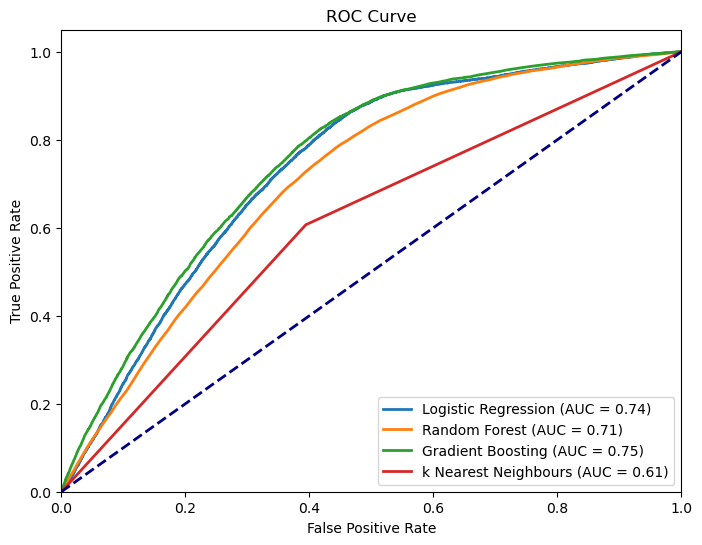

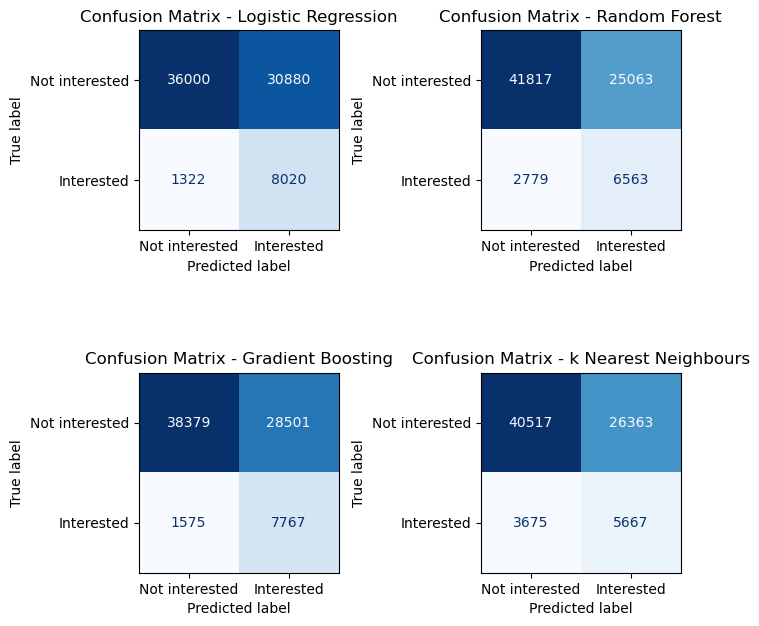

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier


# One-hot encoding columns
categorical_columns = ["Region_Code", "Policy_Sales_Channel"]
onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Numerical columns for standardization
numeric_columns = ["Age", "Annual_Premium", "Vintage"]
# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])


# Create a single ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_columns),('cat', onehot_transformer, categorical_columns)])

# Feature selection
feature_selector = SelectKBest(score_func=mutual_info_classif, k=30)


# Define different machine learning models
models = {
    'Logistic Regression': LogisticRegression(random_state=1),
    'Random Forest': RandomForestClassifier(criterion='entropy', random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1),
    'k Nearest Neighbours':KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
}

# Create a figure for ROC curves
plt.figure(figsize=(8, 6))

# Initialize a dictionary to store confusion matrix displays
all_evaluation_metrics=[]
cm_displays = {}
trained_models = {}
 
# Loop over the models and fit each one using the same preprocessing pipeline
for model_name, model in models.items():
    full_pipeline = Pipeline([('preprocessor', preprocessor), ('feature_selector', feature_selector), ('model', model)])

    # Fit the pipeline on the training data and use it to predict the test data
    full_pipeline.fit(X_train, y_train)
    trained_models[model_name] = full_pipeline
        
    y_pred = full_pipeline.predict(X_test)
    
    # Evaluate the model and calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC curve and AUC score
    y_proba = full_pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    model_auc = roc_auc_score(y_test, y_proba)
    
    # Store the metrics in the DataFrame
    evaluation_metrics = {'Model': model_name,
                          'Accuracy': accuracy,
                          'Precision': precision,
                          'Recall': recall,
                          'F1 Score': f1,
                          'AUC Score': model_auc
                          }
    all_evaluation_metrics.append(evaluation_metrics)
    
    # Calculate confusion matrix and display it
    confusion = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion, display_labels=['Not interested', 'Interested'])
    cm_displays[model_name] = cm_display
    
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {model_auc:.2f})')
    
# Customize the ROC plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


# Display the evaluation metrics DataFrame
all_evaluation_metrics_df = pd.DataFrame(all_evaluation_metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'])
print(all_evaluation_metrics_df)

plt.legend(loc='lower right')

# Create subplots for confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
for i, (model_name, cm_display) in enumerate(cm_displays.items()):
    ax = axes[i // 2, i % 2]
    cm_display.plot(cmap='Blues', values_format='.0f', xticks_rotation='horizontal', ax=ax, colorbar=False)
    ax.set_title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()


In [36]:
all_evaluation_metrics_df = all_evaluation_metrics_df.round(3)
all_evaluation_metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.578,0.206,0.858,0.332,0.738
1,Random Forest,0.635,0.208,0.703,0.320,0.711
2,Gradient Boosting,0.605,0.214,0.831,0.341,0.753
3,k Nearest Neighbours,0.606,0.177,0.607,0.274,0.606


## Conclusion on Model selection

This training of the model done at this point is the minimum Model development which will still undergo some optimization to improve the models overall performance in terms of accuracy and other metrics.
For each of the models hyerparameter tuning will be explored and model will be retrained as we proceed in the continous end-to-end MLOps process.

However, based on the results obtained from the four models trained to predict which customers are interested in the vehicle insurance, with particular refernce to the Recall and ROC metrics, the Logistics regression model and Gradient boost Models performed best in identifying the highest no of True positives and minimal error in false negatives.

The selected model to be prepared for deployment to production is the Logistics regression model.

### Save Selected Model for Deployment 

In [ ]:
import pickle

# Specify the model name you want to save
model_name_to_save = 'Logistic Regression'

# Get the specified model
model_to_save = trained_models[model_name_to_save]

# Define the filename for the model
model_filename = f"{model_name_to_save}.pkl"

# Save the model
with open(model_filename, "wb") as model_file:
    pickle.dump(model_to_save, model_file)